In [ ]:
import numpy as np #python library for scientific computing
import pandas as pd #python library for data manipulation and analysis
import matplotlib.pyplot as plt #python library for charting
from pandas_datareader import data as pdr #extract data from internet sources into pandas data frame

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 315 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


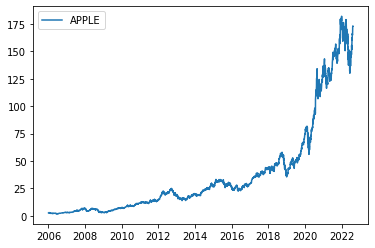

There are 4184 number of days in the dataset.


In [ ]:
#realtime data from yfinance
yf.pdr_override()

data = pdr.get_data_yahoo('AAPL', start='2006-01-01')

plt.plot(data['Close'])

plt.legend(['APPLE'], loc='upper left')
plt.show()
print('There are {} number of days in the dataset.'.format(data.shape[0]))

In [ ]:
# Feature creation
def get_technical_indicators(dataset):
    # 7 and 21 days MA
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window=20).std() 
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Momentum
    dataset['momentum'] = dataset['Close']-1
    
    return dataset

In [ ]:
data = get_technical_indicators(data)

LS_data=data
data

,Open,High,Low,Close,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Date,,,,,,,,,,,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.279427,807234400,NaN,NaN,2.669643,2.669643,0.000000,NaN,NaN,NaN,2.669643,1.669643
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.286134,619603600,NaN,NaN,2.673723,2.673899,0.000176,NaN,NaN,NaN,2.675536,1.677500
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.268144,449422400,NaN,NaN,2.667509,2.667080,-0.000429,NaN,NaN,NaN,2.662308,1.656429
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.326692,704457600,NaN,NaN,2.683581,2.685363,0.001782,NaN,NaN,NaN,2.704625,1.725000
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.319068,675040800,NaN,NaN,2.691116,2.693706,0.002591,NaN,NaN,NaN,2.712287,1.716071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500,165.190000,157.320000,156.726156,162.382926,5.656771,6.785961,170.891921,143.748079,167.811367,168.240005
2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200,166.401430,158.415238,157.597552,163.322477,5.724925,6.796512,172.008261,144.822215,168.263793,167.490005
2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400,167.254288,159.540476,158.671808,164.672866,6.001058,7.075129,173.690734,145.390219,170.821268,171.100006


In [ ]:
# clearing null values 
print('Dataframe dimensions:', data.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
print(data.head())
tab_info
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(data.shape[0]-missing_df['missing values'])/data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)
data = data.dropna()

Dataframe dimensions: (4184, 16)
                Open      High       Low     Close  Adj Close     Volume  ma7  \
Date                                                                            
2006-01-03  2.585000  2.669643  2.580357  2.669643   2.279427  807234400  NaN   
2006-01-04  2.683214  2.713571  2.660714  2.677500   2.286134  619603600  NaN   
2006-01-05  2.672500  2.675000  2.633929  2.656429   2.268144  449422400  NaN   
2006-01-06  2.687500  2.739286  2.662500  2.725000   2.326692  704457600  NaN   
2006-01-09  2.740357  2.757143  2.705000  2.716071   2.319068  675040800  NaN   

            ma21     26ema     12ema      MACD  20sd  upper_band  lower_band  \
Date                                                                           
2006-01-03   NaN  2.669643  2.669643  0.000000   NaN         NaN         NaN   
2006-01-04   NaN  2.673723  2.673899  0.000176   NaN         NaN         NaN   
2006-01-05   NaN  2.667509  2.667080 -0.000429   NaN         NaN         NaN   

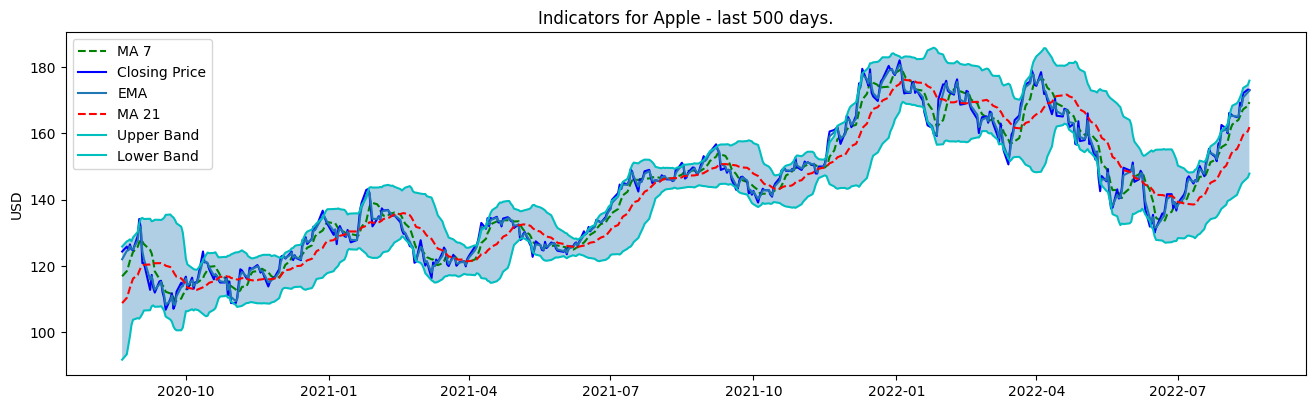

In [ ]:
#plotting features created
def plot_technical_indicators(dataset, last_days,type):
    plt.figure(figsize=(16, 10), dpi=100)
    shape = dataset.shape[0]
    xmacd = shape-last_days
    
    #splitting the dataset for required num of days to plot
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ema'],label='EMA')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Indicators for {} - last {} days.'.format(type,last_days))
    plt.ylabel('USD')
    plt.legend()
    plt.show()

plot_technical_indicators(data, 500, 'Apple')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


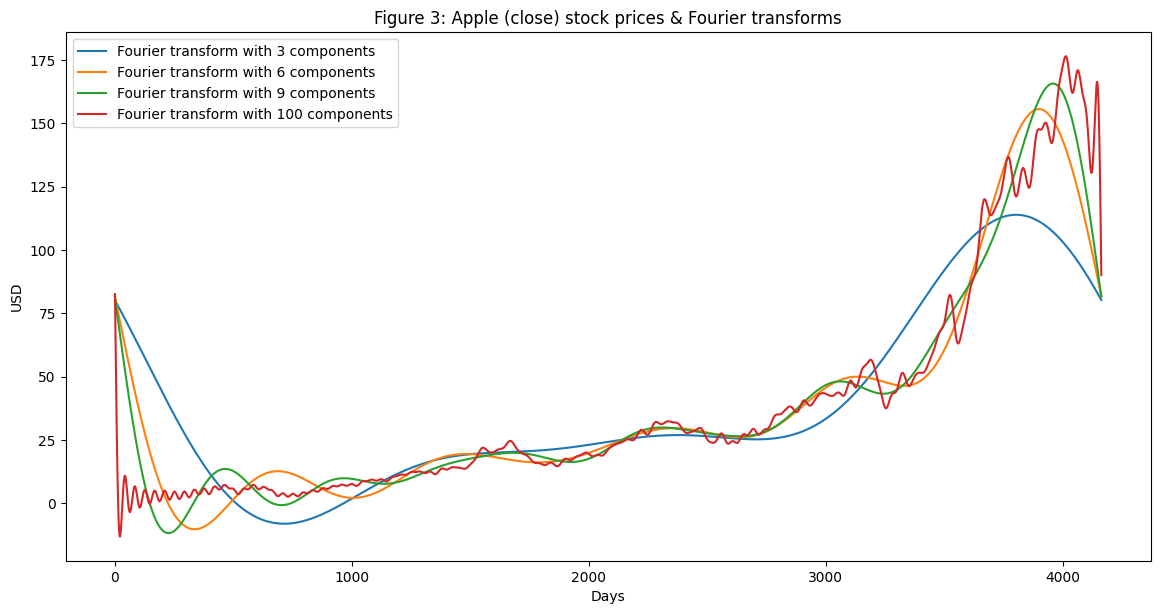

In [ ]:
#fourier plots
data_FT = data['Close']
close_fft = np.fft.fft(np.asarray(data_FT.tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Apple (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [ ]:
!pip install mplfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 4.7 MB/s 


In [ ]:
import mplfinance as mpf

In [ ]:
Data_Linearreg=data
N_beat=data

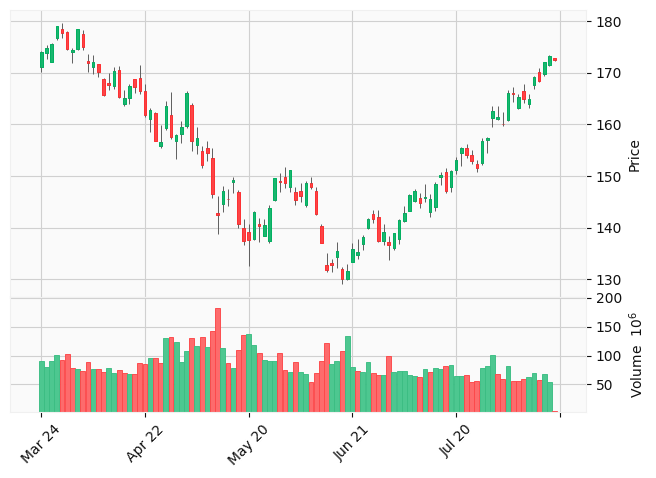

In [ ]:
data_slice = data.tail(100)
mpf.plot(data_slice, type='candle', style='yahoo', volume=True)

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 28.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# *TIME SERIES PREDICTION*

# **AUTOREGGRESIVE**

In [ ]:

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return np.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
series = data['ema']
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
model_fit.save('ar_model.pkl')
# save the differenced dataset
np.save('ar_data.npy', X)
# save the last ob
np.save('ar_obs.npy', [series.values[-1]])

In [ ]:
from statsmodels.tsa.ar_model import AutoRegResults
model = AutoRegResults.load('ar_model.pkl')
data = np.load('ar_data.npy')
last_ob = np.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 172.506611


## **LINEAR REGRESSION**

In [ ]:
df=Data_Linearreg.drop(['Open','High','Low','Adj Close'], axis = 1) 
X1_ = df.drop(['Close'], axis=1)
y1_ = df['Close'] 

In [ ]:
t = .8
t = int(t*len(df))

X_train = X1_[:t]
y_train = y1_[:t]

X_test = X1_[t:]
y_test = y1_[t:]

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)

In [ ]:
linear.predict(X_test)

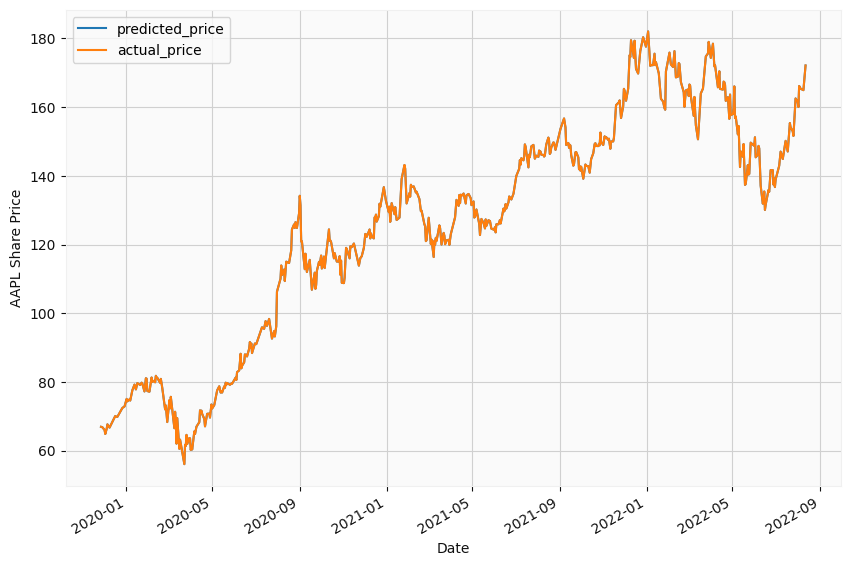

In [ ]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['Close'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("AAPL Share Price")
plt.show()

In [ ]:
y_train=y_train.astype('int')

In [ ]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score

n_features_list = list(range(4, 11)) #checking for optimal number of features between 4 to 11
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 11):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] 

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
n_features_list

[4, 5, 6, 7, 8, 9, 10]

In [ ]:
final_features=[]
for i in n_features_list:
  print(X_train.columns[i])
  final_features.append(X_train.columns[i])

12ema
MACD
20sd
upper_band
lower_band
ema
momentum


In [ ]:
X_train=X_train.filter(final_features,axis=1)
X_test=X_test.filter(final_features,axis=1)
X_train

,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Date,,,,,,,
2009-02-02,3.203270,0.022862,0.157112,3.489410,2.860964,3.262973,2.268214
2009-02-03,3.221808,0.028665,0.153650,3.486280,2.871679,3.301467,2.320714
2009-02-04,3.240559,0.034208,0.154698,3.486623,2.867832,3.327870,2.341071
2009-02-05,3.272592,0.045255,0.165748,3.514575,2.851582,3.405956,2.445000
2009-02-06,3.317722,0.061405,0.184588,3.567066,2.828716,3.509605,2.561429
...,...,...,...,...,...,...,...
2019-11-20,65.332032,2.023991,2.032276,68.095148,59.966044,66.057249,64.797501
2019-11-21,65.358258,1.887664,1.895355,68.045473,60.464052,65.687418,64.502502
2019-11-22,65.371603,1.754757,1.789769,68.050967,60.891892,65.525806,64.445000


In [ ]:
from sklearn.linear_model import LinearRegression
linearf = LinearRegression().fit(X_train, y_train)
linearf.coef_

array([-0.00516913, -0.02326557,  0.00270295,  0.00137173, -0.00944007,
        0.0577629 ,  0.95450221])

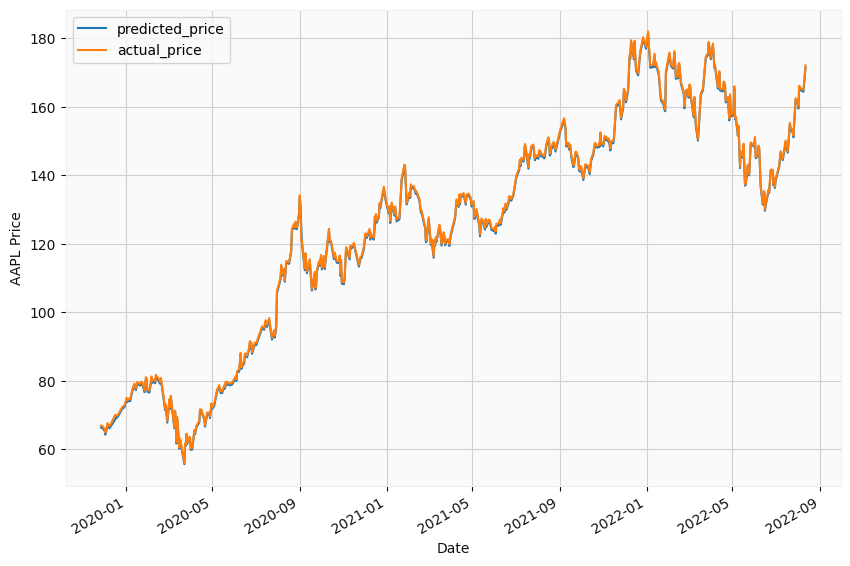

In [ ]:
predicted_pricef = linearf.predict(X_test)
predicted_pricef = pd.DataFrame(
    predicted_pricef, index=y_test.index, columns=['price'])
predicted_pricef.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("AAPL Price")
plt.show()

In [ ]:
# R square
r2_score = linearf.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

99.97

In [ ]:
#Create a new dataframe with only the 'Close column
data1 = Data_Linearreg.filter(['Close'])
#Convert the dataframe to a numpy array
dataset1 = Data_Linearreg.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset1) * .8 ))

training_data_len

2726

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset1)
scaled_data

array([[9.78234706e-04, 8.73931520e-04, 1.33183939e-03, ...,
        4.55277169e-04, 1.42308346e-03, 1.67558629e-03],
       [1.53892930e-03, 1.14803048e-03, 1.61158867e-03, ...,
        5.19552983e-04, 1.63979060e-03, 1.96881399e-03],
       [1.79740961e-03, 1.71807189e-03, 2.18324366e-03, ...,
        4.96478907e-04, 1.78842805e-03, 2.08251311e-03],
       ...,
       [9.16770323e-01, 9.24365175e-01, 9.30638970e-01, ...,
        8.45592808e-01, 9.27776247e-01, 9.28675927e-01],
       [9.30020281e-01, 9.33541506e-01, 9.37961090e-01, ...,
        8.52036213e-01, 9.30323255e-01, 9.24486961e-01],
       [9.28684208e-01, 9.40103896e-01, 9.44829032e-01, ...,
        8.55443488e-01, 9.44720999e-01, 9.44649856e-01]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00097823, 0.00153893, 0.00179741, 0.00170793, 0.00255296,
       0.00314547, 0.00340991, 0.00242372, 0.00231635, 0.00294465,
       0.00252313, 0.00216126, 0.00182723, 0.00103788, 0.00148525,
       0.00065017, 0.00112935, 0.00155483, 0.0007456 , 0.00078338,
       0.00094443, 0.00119297, 0.00124864, 0.00082712, 0.        ,
       0.00013719, 0.0011194 , 0.00173378, 0.0024098 , 0.00245553,
       0.00219904, 0.00312757, 0.0035133 , 0.00356101, 0.00368429,
       0.00441001, 0.00465259, 0.00470229, 0.00478182, 0.00404218,
       0.00422908, 0.00395867, 0.00516158, 0.00596684, 0.00611596,
       0.0064321 , 0.00621339, 0.00680789, 0.00712402, 0.00703654,
       0.00656531, 0.00696098, 0.00735665, 0.00746601, 0.00690133,
       0.00764495, 0.00843828, 0.0080446 , 0.00769864, 0.00778811])]
[0.008086355576753263]

[array([0.00097823, 0.00153893, 0.00179741, 0.00170793, 0.00255296,
       0.00314547, 0.00340991, 0.00242372, 0.00231635, 0.00294465,
       0.00252313, 0.00216126, 0.0

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2666, 60, 1)

## **N-Beats**

In [ ]:
!pip install nbeats_forecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.3 MB 1.2 MB/s 
     |████████████████████████████████| 11.3 MB 35.6 MB/s 
     |████████████████████████████████| 11.3 MB 54.5 MB/s 
     |████████████████████████████████| 11.3 MB 50.7 MB/s 
     |████████████████████████████████| 11.5 MB 51.5 MB/s 
     |████████████████████████████████| 10.8 MB 48.6 MB/s 
     |████████████████████████████████| 9.9 MB 49.9 MB/s 
     |████████████████████████████████| 9.9 MB 46.5 MB/s 
     |████████████████████████████████| 9.9 MB 50.7 MB/s 
     |████████████████████████████████| 9.9 MB 18.5 MB/s 
     |████████████████████████████████| 9.9 MB 45.0 MB/s 
     |████████████████████████████████| 9.9 MB 42.4 MB/s 
     |████████████████████████████████| 9.5 MB 44.0 MB/s 
  Created wheel for nbeats-forecast: filename=nbeats_forecast-1.3.7-py3-none-any.whl size=6586 sha256=61e37a178010c67fabc480e6c01c0417fa29efd1

In [ ]:
from nbeats_forecast import NBeats

In [ ]:
import pandas as pd
import torch
from torch import optim
from torch.nn import functional as F
#from trainer_pytorch import save
from nbeats_pytorch.model import NBeatsNet
import warnings

warnings.filterwarnings(action='ignore', message='Setting attributes')

In [ ]:
df8=pd.DataFrame(N_beat['Close'])
df8.to_csv("df_train.csv")

In [ ]:
# df8

In [ ]:
# plot utils.
def plot_scatter(*args, **kwargs):
    plt.plot(*args, **kwargs)
    plt.scatter(*args, **kwargs)


# simple batcher.
def data_generator(x, y, size):
    assert len(x) == len(y)
    batches = []
    for ii in range(0, len(x), size):
        batches.append((x[ii:ii + size], y[ii:ii + size]))
    for batch in batches:
        yield batch

               Close
Date                
2009-02-02  3.268214
2009-02-03  3.320714
2009-02-04  3.341071
2009-02-05  3.445000
2009-02-06  3.561429
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=21, forecast_length=7, share_thetas=False) at @140519351331344
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=21, forecast_length=7, share_thetas=False) at @140519351332176
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=21, forecast_length=7, share_thetas=False) at @140519351118800
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=21, forecast_length=7, share_thetas=False) at @140519351117456
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=21, forecast_length=7, share_thetas=False) at @140519351116176
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=21, forecast_length=7, share_the

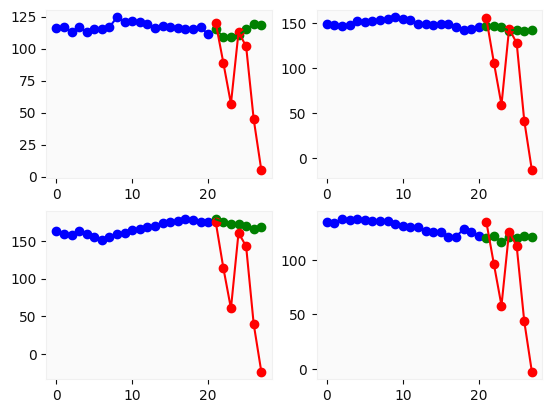

epoch = 0000, grad_step = 000194, tr_loss (epoch) = 25.757, te_loss (epoch) = 107.839


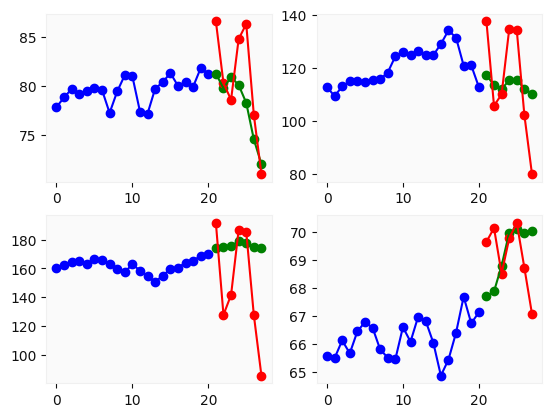

epoch = 0020, grad_step = 004074, tr_loss (epoch) = 0.084, te_loss (epoch) = 17.398


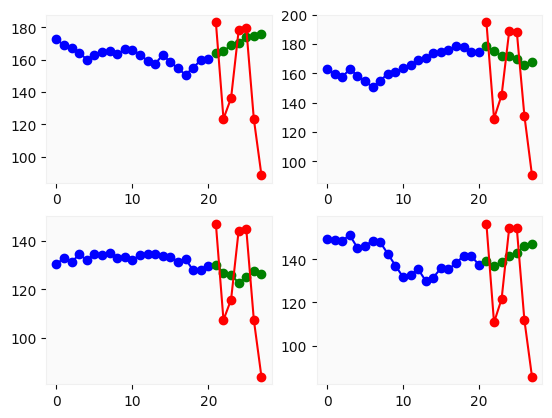

epoch = 0040, grad_step = 007954, tr_loss (epoch) = 0.066, te_loss (epoch) = 15.901


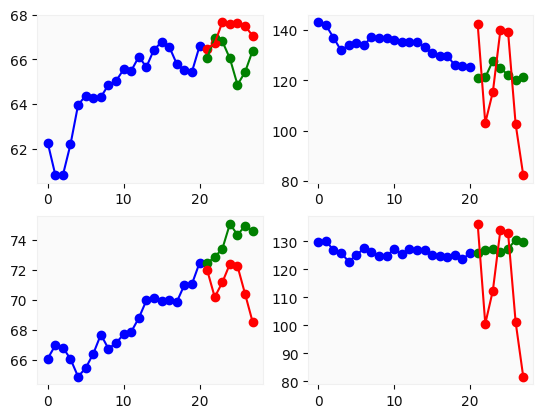

epoch = 0060, grad_step = 011834, tr_loss (epoch) = 0.050, te_loss (epoch) = 16.361


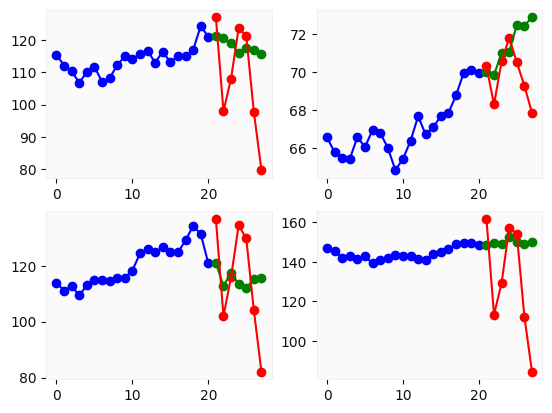

epoch = 0080, grad_step = 015714, tr_loss (epoch) = 0.044, te_loss (epoch) = 16.708


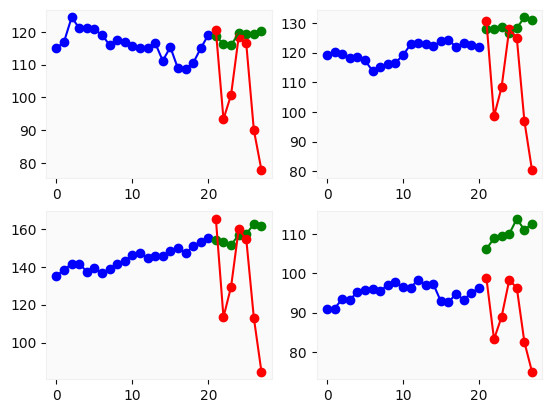

epoch = 0100, grad_step = 019594, tr_loss (epoch) = 0.040, te_loss (epoch) = 17.640


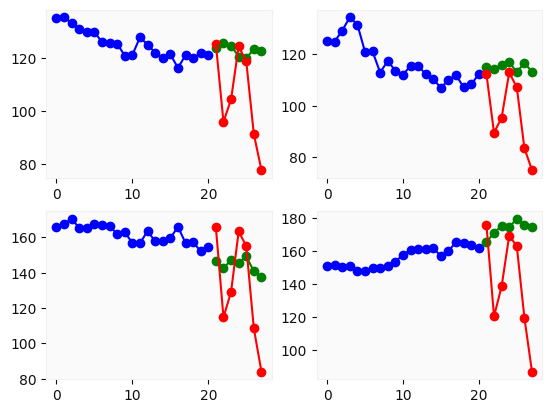

epoch = 0120, grad_step = 023474, tr_loss (epoch) = 0.039, te_loss (epoch) = 17.390


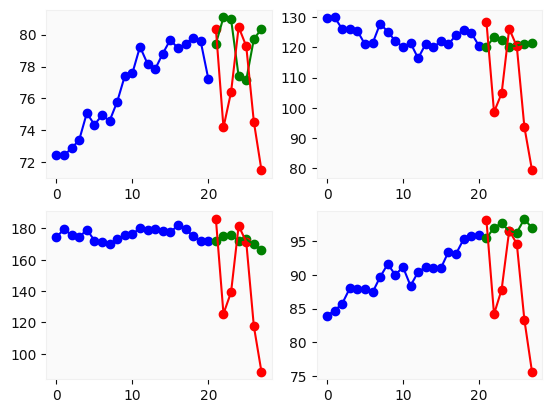

epoch = 0140, grad_step = 027354, tr_loss (epoch) = 0.036, te_loss (epoch) = 17.936


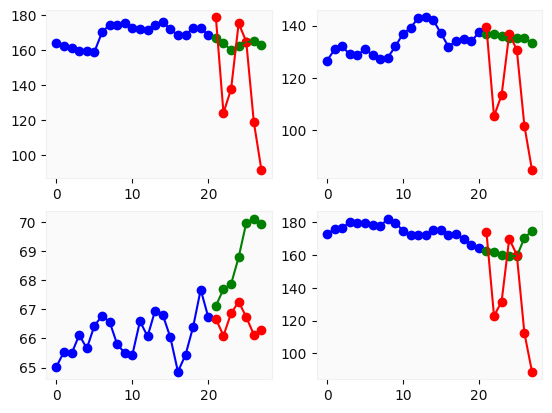

epoch = 0160, grad_step = 031234, tr_loss (epoch) = 0.032, te_loss (epoch) = 17.496


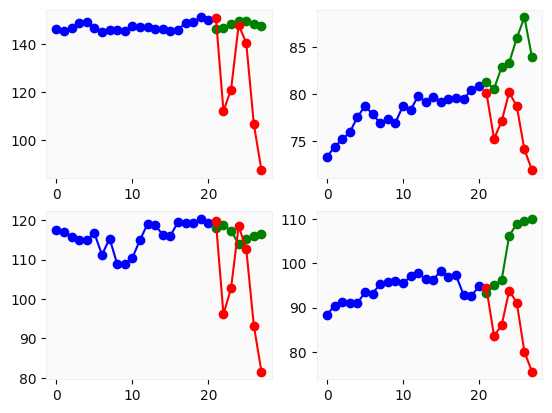

epoch = 0180, grad_step = 035114, tr_loss (epoch) = 0.033, te_loss (epoch) = 17.766


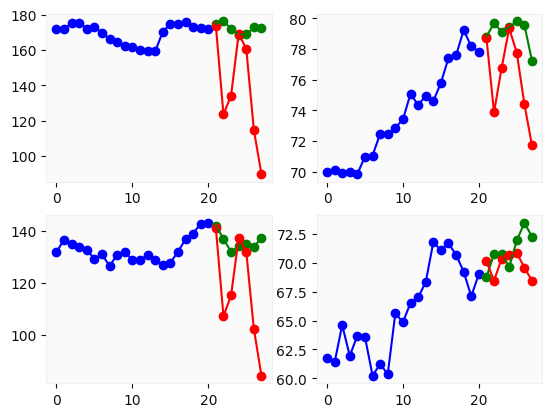

epoch = 0200, grad_step = 038994, tr_loss (epoch) = 0.032, te_loss (epoch) = 18.682


In [ ]:
def main():
    forecast_length = 7
    backcast_length = 3 * forecast_length
    batch_size = 14  

    apple = pd.read_csv('df_train.csv', index_col=0, parse_dates=True)
    print(apple.head())
    apple = apple.values.flatten()  # just keep np array here for simplicity.

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(apple) - forecast_length):
        x.append(apple[epoch - backcast_length:epoch])
        y.append(apple[epoch:epoch + forecast_length])
    x = np.array(x)
    y = np.array(y)

    # split train/test.
    c = int(len(x) * 0.8)
    x_train, y_train = x[:c], y[:c]
    x_test, y_test = x[c:], y[c:]

    # normalization.
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
        device = 'cpu'
    )
    optimiser = optim.Adam(lr=1e-4, params=net.parameters())

    grad_step = 0
    for epoch in range(201):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # test.
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        if epoch % 20 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {100 * train_loss:.3f}, '
                  f'te_loss (epoch) = {100 * test_loss:.3f}')




if __name__ == '__main__':
    main()

## **LSTM**

In [ ]:

#Create a new dataframe with only the 'Close column
data = LS_data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

3348

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00477247],
       [0.00481607],
       [0.00469914],
       ...,
       [0.94500572],
       [0.95105452],
       [0.94747515]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00477247, 0.00481607, 0.00469914, 0.00507966, 0.00503011,
       0.00598342, 0.00658592, 0.00666322, 0.00692087, 0.00674646,
       0.00630647, 0.00562271, 0.00503804, 0.00535119, 0.00502813,
       0.00466346, 0.00429284, 0.00423338, 0.00482201, 0.00492309,
       0.00490525, 0.00424726, 0.00419771, 0.00329593, 0.00335539,
       0.0035952 , 0.00283018, 0.00329792, 0.00278261, 0.00336332,
       0.00367646, 0.00394402, 0.00388853, 0.00364872, 0.00409267,
       0.00417789, 0.00412041, 0.00402726, 0.00353178, 0.00365268,
       0.00375376, 0.00337917, 0.00293522, 0.00309972, 0.0029709 ,
       0.00262803, 0.00248137, 0.00297486, 0.0032999 , 0.00308387,
       0.00270334, 0.00277271, 0.00263992, 0.00220786, 0.00218011,
       0.00188084, 0.00184121, 0.00175202, 0.00159347, 0.00231092])]
[0.002394157126176853]

[array([0.00477247, 0.00481607, 0.00469914, 0.00507966, 0.00503011,
       0.00598342, 0.00658592, 0.00666322, 0.00692087, 0.00674646,
       0.00630647, 0.00562271, 0.0

In [ ]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3288, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(16))
model.add(Dense(1))

In [ ]:
scaled_data.shape

(4184, 1)

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
training_data_len

3348

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
#1:
model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
52/52 [==============================] - 11s 9ms/step - loss: 6.5726e-04
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 3.1201e-05
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 2.9648e-05
Epoch 4/100
52/52 [==============================] - 0s 8ms/step - loss: 2.9487e-05
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 2.7013e-05
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 2.7917e-05
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 2.9080e-05
Epoch 8/100
52/52 [==============================] - 0s 8ms/step - loss: 2.6329e-05
Epoch 9/100
52/52 [==============================] - 0s 8ms/step - loss: 2.3207e-05
Epoch 10/100
52/52 [==============================] - 0s 8ms/step - loss: 2.6313e-05
Epoch 11/100
52/52 [==============================] - 0s 8ms/step - loss: 2.1547e-05
Epoch 12/100
52/52 [==============================] - 0s 8ms/step - loss:

4.26253763261966


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


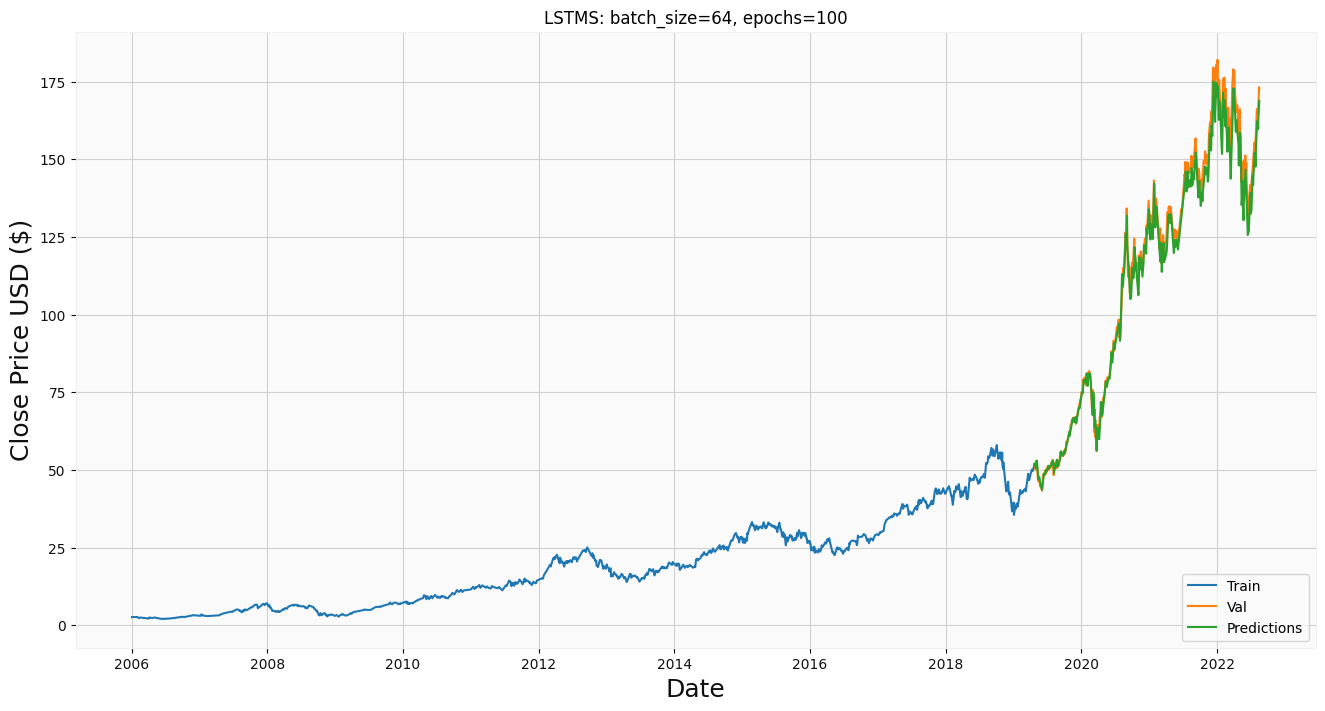

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTMS: batch_size=64, epochs=100')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-04-24,51.790001,51.885681
2019-04-25,51.320000,52.081028
2019-04-26,51.075001,51.795780
2019-04-29,51.152500,51.412754
2019-04-30,50.167500,51.261318
...,...,...
2022-08-10,169.240005,159.721970
2022-08-11,168.490005,163.204102
2022-08-12,172.100006,164.116272


In [ ]:
print(np.mean(((predictions))))

110.099434


In [ ]:
#2:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
103/103 [==============================] - 1s 8ms/step - loss: 8.2313e-06
Epoch 2/100
103/103 [==============================] - 1s 8ms/step - loss: 7.8124e-06
Epoch 3/100
103/103 [==============================] - 1s 8ms/step - loss: 8.3505e-06
Epoch 4/100
103/103 [==============================] - 1s 8ms/step - loss: 8.2512e-06
Epoch 5/100
103/103 [==============================] - 1s 8ms/step - loss: 9.8725e-06
Epoch 6/100
103/103 [==============================] - 1s 8ms/step - loss: 1.2250e-05
Epoch 7/100
103/103 [==============================] - 1s 8ms/step - loss: 7.5866e-06
Epoch 8/100
103/103 [==============================] - 1s 8ms/step - loss: 7.2283e-06
Epoch 9/100
103/103 [==============================] - 1s 8ms/step - loss: 7.3443e-06
Epoch 10/100
103/103 [==============================] - 1s 8ms/step - loss: 7.2504e-06
Epoch 11/100
103/103 [==============================] - 1s 8ms/step - loss: 7.3987e-06
Epoch 12/100
103/103 [==============================

8.382489547624177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


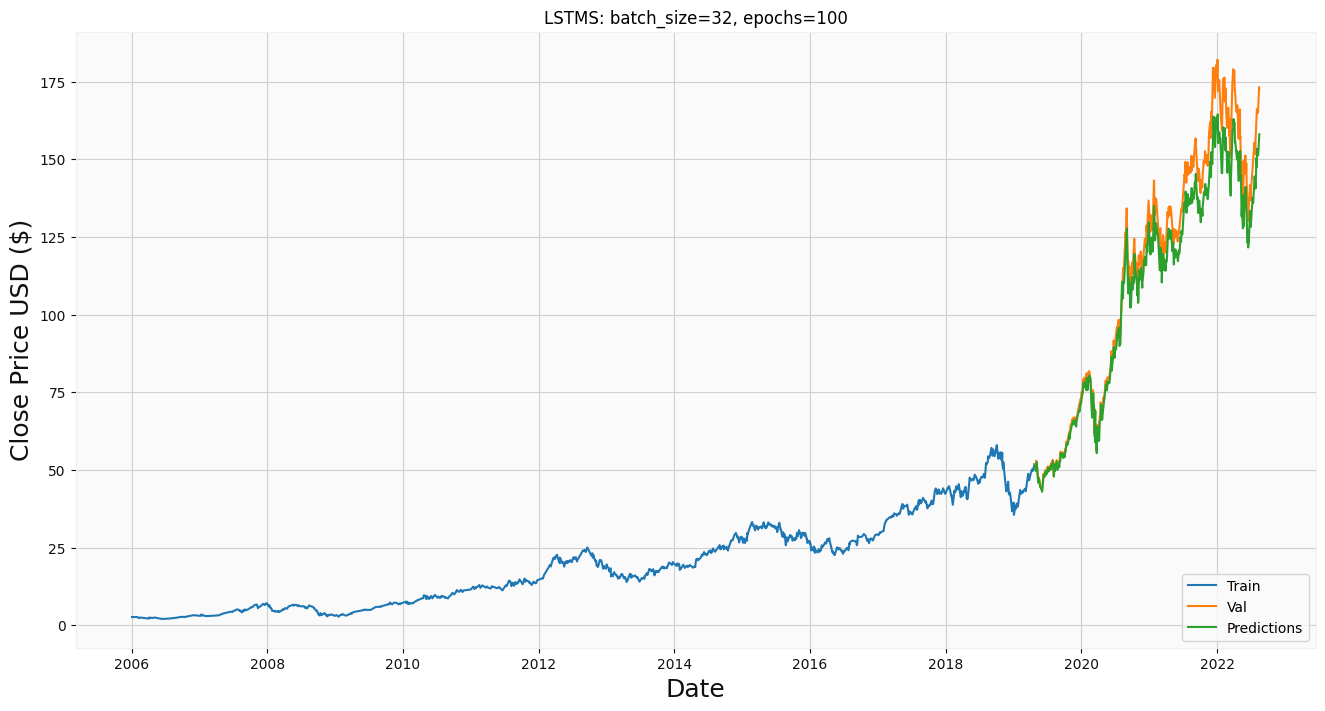

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTMS: batch_size=32, epochs=100')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#3:
model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
411/411 [==============================] - 4s 7ms/step - loss: 9.3219e-06
Epoch 2/100
411/411 [==============================] - 3s 7ms/step - loss: 8.5162e-06
Epoch 3/100
411/411 [==============================] - 3s 7ms/step - loss: 9.5065e-06
Epoch 4/100
411/411 [==============================] - 3s 7ms/step - loss: 8.2332e-06
Epoch 5/100
411/411 [==============================] - 3s 7ms/step - loss: 6.9403e-06
Epoch 6/100
411/411 [==============================] - 3s 7ms/step - loss: 7.6772e-06
Epoch 7/100
411/411 [==============================] - 3s 7ms/step - loss: 8.3030e-06
Epoch 8/100
411/411 [==============================] - 3s 7ms/step - loss: 8.6787e-06
Epoch 9/100
411/411 [==============================] - 3s 7ms/step - loss: 8.0181e-06
Epoch 10/100
411/411 [==============================] - 3s 7ms/step - loss: 8.0523e-06
Epoch 11/100
411/411 [==============================] - 3s 7ms/step - loss: 9.0589e-06
Epoch 12/100
411/411 [==============================

21.0335931048656


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


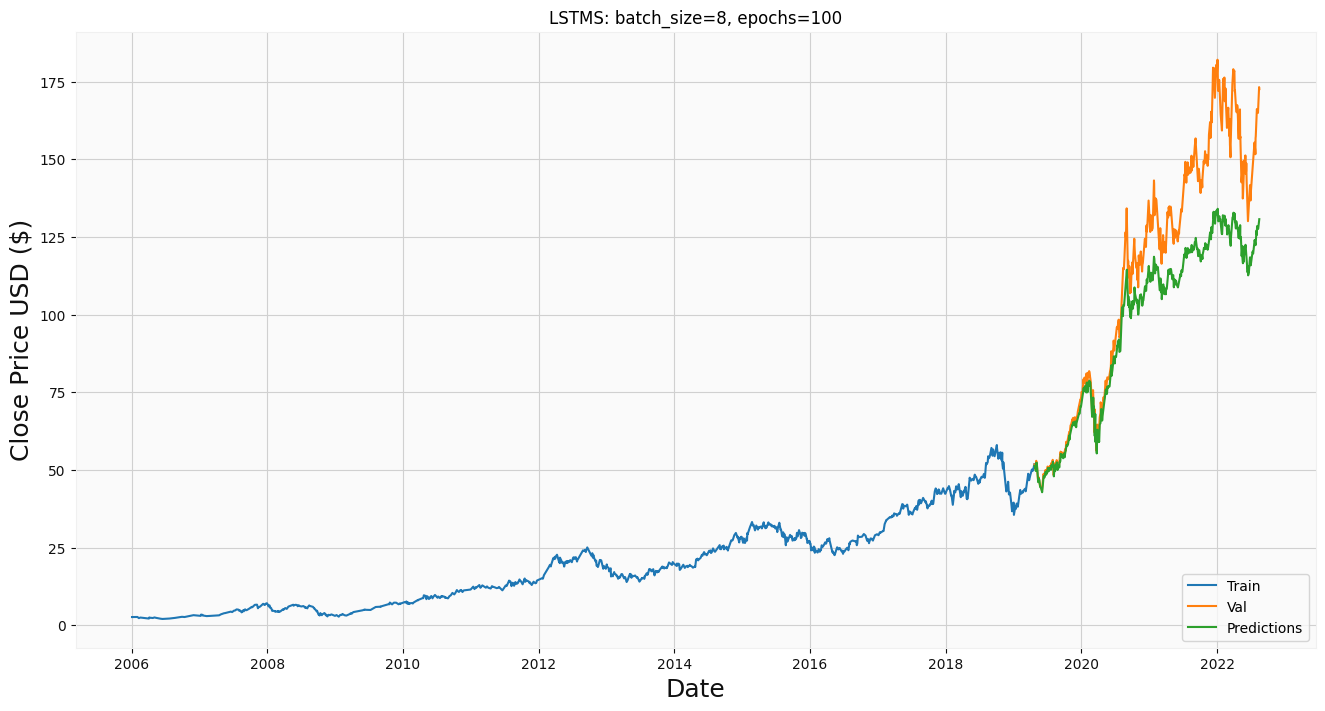

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTMS: batch_size=8, epochs=100')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()